In [17]:
# %pip install networkx matplotlib
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

In [18]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices  # Number of vertices
        self.graph = defaultdict(list)  # Default dictionary to store graph

    def add_edge(self, u, v):
        self.graph[u].append(v)

    def dfs(self, v, visited, stack=None):
        visited[v] = True
        for i in self.graph[v]:
            if not visited[i]:
                self.dfs(i, visited, stack)
        if stack is not None:
            stack.append(v)

    def get_transpose(self):
        g = Graph(self.V)
        for i in self.graph:
            for j in self.graph[i]:
                g.add_edge(j, i)
        return g

    def find_all_cycles(self):
        stack = []
        visited = [False] * (self.V + 1)
        for i in range(1, self.V + 1):
            if not visited[i]:
                self.dfs(i, visited, stack)

        transpose_graph = self.get_transpose()

        visited = [False] * (self.V + 1)
        all_cycles = []

        while stack:
            v = stack.pop()
            if not visited[v]:
                scc_stack = []
                transpose_graph.dfs(v, visited, scc_stack)
                if len(scc_stack) > 1:
                    cycle = self.order_cycle_path(scc_stack)
                    all_cycles.append(cycle)

        return all_cycles

    def order_cycle_path(self, scc_nodes):
        # To print the cycle in a trackable order, we perform DFS from one node in the SCC
        start_node = scc_nodes[0]
        visited = set()
        cycle_path = []

        def dfs_cycle(v):
            visited.add(v)
            cycle_path.append(v)
            for neighbor in self.graph[v]:
                if neighbor in scc_nodes and neighbor not in visited:
                    dfs_cycle(neighbor)

        dfs_cycle(start_node)
        return cycle_path

def find_all_cycles(N, edges):
    g = Graph(N)
    for u, v in edges:
        g.add_edge(u, v)
    return g.find_all_cycles()

def visualize_graph(N, edges, cycles):
    G = nx.DiGraph()
    G.add_nodes_from(range(1, N + 1))
    G.add_edges_from(edges)

    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color="lightblue")
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color="gray", arrows=True)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")

    for cycle_nodes in cycles:
        cycle_edges = [(u, v) for u, v in edges if u in cycle_nodes and v in cycle_nodes]
        nx.draw_networkx_nodes(G, pos, nodelist=cycle_nodes, node_size=500, node_color="orange")
        nx.draw_networkx_edges(G, pos, edgelist=cycle_edges, edge_color="red", arrows=True)

    plt.title("Graph Visualization with All Cycles Highlighted")
    plt.show()

# Example usage
# cycles = find_all_cycles(N, edges)
# print("All cycles found:", cycles)
# visualize_graph(N, edges, cycles)

All cycles found: [[2, 3, 4, 1, 5]]


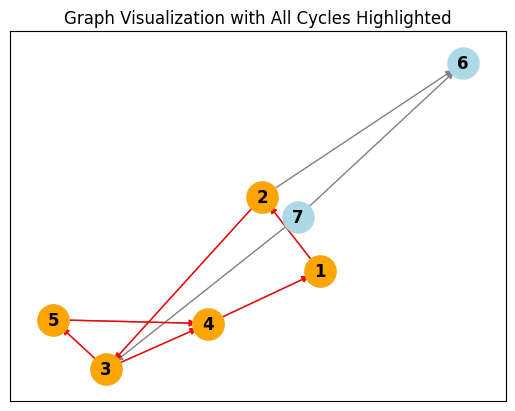

In [19]:
# Example input
N = 7
edges = [
    (1, 2), (2, 3), (3, 4), (4, 1), (3, 5),
    (5, 4), (2, 6), (7, 3), (7, 6)
]

def run_test(N, edges):
    # # Find the largest cycle and visualize
    # largest_cycle_size, cycle_nodes = find_all_cycles(N, edges)
    # print("Maximum number of nodes in the largest cycle:", largest_cycle_size)
    # print("Nodes in the largest cycle:", cycle_nodes)
    # # Visualize the graph
    # visualize_graph(N, edges, cycle_nodes)
    cycles = find_all_cycles(N, edges)
    print("All cycles found:", cycles)
    visualize_graph(N, edges, cycles)
    
run_test(N, edges)

All cycles found: [[10, 9], [5, 3]]


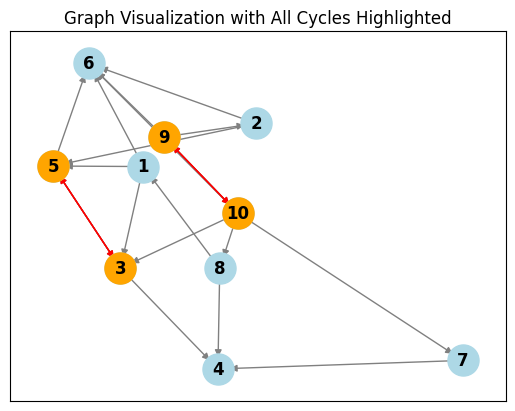

In [20]:
# 6.1
'''
10 20
1 3
1 5
1 6
2 5
2 6
3 4
3 5
5 3
5 6
7 4
8 1
8 4
9 2
9 6
9 10
10 3
10 6
10 7 
10 8
10 9
'''
N = 10
edges = [
    (1, 3), (1, 5), (1, 6), (2, 5), (2, 6),
    (3, 4), (3, 5), (5, 3), (5, 6), (7, 4),
    (8, 1), (8, 4), (9, 2), (9, 6), (9, 10),
    (10, 3), (10, 6), (10, 7), (10, 8), (10, 9)
]
run_test(N, edges)

All cycles found: [[5, 2, 6, 7, 8, 3, 4, 1, 9, 11, 10]]


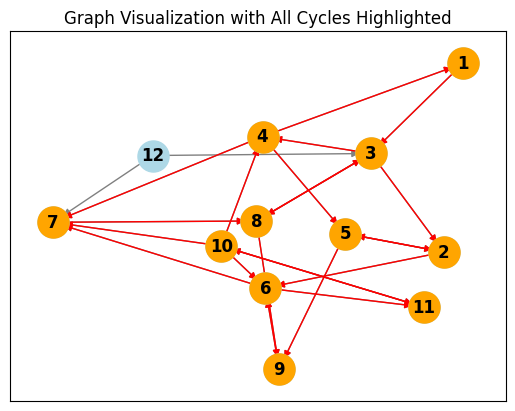

In [21]:
# 6.2
'''
12 24
1 3
2 5
2 6
3 2
3 4
3 8
4 1
4 5
4 7
5 2
5 9
6 7
6 11
7 8
8 3
8 9
9 6
10 4
10 6
10 7
10 11
11 10
12 3
12 7
'''
N = 12
edges = [
    (1, 3), (2, 5), (2, 6), (3, 2), (3, 4),
    (3, 8), (4, 1), (4, 5), (4, 7), (5, 2),
    (5, 9), (6, 7), (6, 11), (7, 8), (8, 3),
    (8, 9), (9, 6), (10, 4), (10, 6), (10, 7),
    (10, 11), (11, 10), (12, 3), (12, 7)
]
run_test(N, edges)

All cycles found: [[8, 3, 4, 5, 7, 6, 1, 9, 2, 10, 13]]


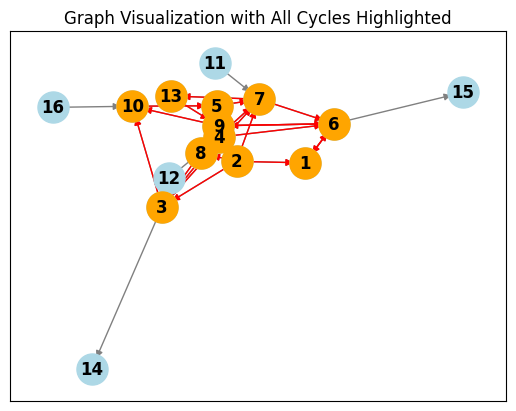

In [22]:
# 6.3
'''
16 32
1 6
2 1
2 3
2 7
2 8
3 4
3 7
3 10
3 14
4 5
4 6
4 9
5 4
5 7
6 1
6 9
6 15
7 6
7 13 
8 3
8 7
8 9
9 2
9 5
9 6
9 10
10 5
11 7
12 3
12 4
13 9
16 10
'''
N = 16
edges = [
    (1, 6), (2, 1), (2, 3), (2, 7), (2, 8),
    (3, 4), (3, 7), (3, 10), (3, 14), (4, 5),
    (4, 6), (4, 9), (5, 4), (5, 7), (6, 1),
    (6, 9), (6, 15), (7, 6), (7, 13), (8, 3),
    (8, 7), (8, 9), (9, 2), (9, 5), (9, 6),
    (9, 10), (10, 5), (11, 7), (12, 3), (12, 4),
    (13, 9), (16, 10)
]
run_test(N, edges)

All cycles found: [[6, 7, 5, 4, 1, 3, 2, 8, 12, 20, 13, 9, 11, 15, 14]]


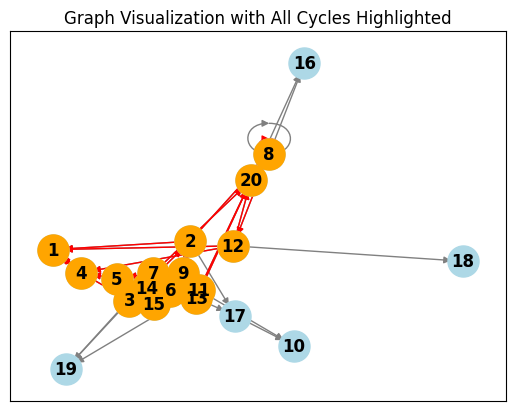

In [23]:
# 6.4
'''
20 41
1 4
2 1
2 6
2 8
2 17
3 2
3 5
3 9
3 19
4 1
4 3
5 4
5 6
6 7
6 13
6 15
7 5
7 19
7 20
8 8
8 12
8 16
9 2
9 11
9 15
11 10
11 19
11 20
12 1
12 4
12 18
12 20
13 9
13 11
13 14
13 17
14 7
15 13
17 10
20 13
20 16
'''
N = 20
edges = [
    (1, 4), (2, 1), (2, 6), (2, 8), (2, 17),
    (3, 2), (3, 5), (3, 9), (3, 19), (4, 1),
    (4, 3), (5, 4), (5, 6), (6, 7), (6, 13),
    (6, 15), (7, 5), (7, 19), (7, 20), (8, 8),
    (8, 12), (8, 16), (9, 2), (9, 11), (9, 15),
    (11, 10), (11, 19), (11, 20), (12, 1), (12, 4),
    (12, 18), (12, 20), (13, 9), (13, 11), (13, 14),
    (13, 17), (14, 7), (15, 13), (17, 10), (20, 13),
    (20, 16)
]
run_test(N, edges)

All cycles found: [[3, 5, 2, 1, 6, 7]]


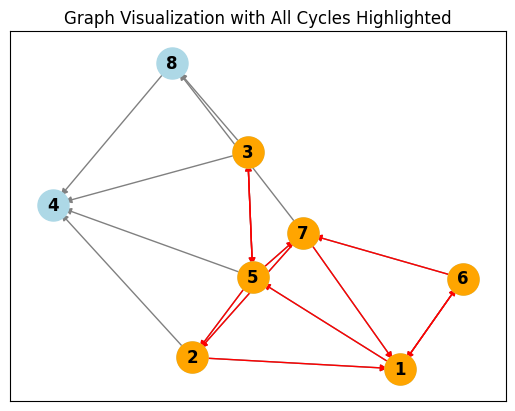

In [24]:
# EX1
'''
8 17
1 5
1 6
2 1
2 4
3 4
3 5
3 8
5 2
5 3
5 4
5 7
6 1
6 7
7 1
7 2
7 8
8 4
'''
N = 8
edges = [
    (1, 5), (1, 6), (2, 1), (2, 4), (3, 4),
    (3, 5), (3, 8), (5, 2), (5, 3), (5, 4),
    (5, 7), (6, 1), (6, 7), (7, 1), (7, 2),
    (7, 8), (8, 4)
]
run_test(N, edges)

All cycles found: [[11, 3, 1, 4, 6, 10, 7, 9, 12, 13, 5, 14]]


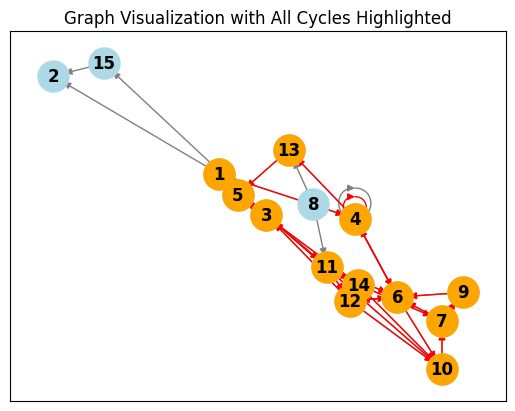

In [25]:
# EX2
'''
15 31
1 2
1 4
1 11
3 1
3 10
3 15
4 4
4 6
4 13
5 3
6 4
6 10
6 12
7 6
7 9
8 11
8 13
9 6
10 7
11 3
11 6
11 12
11 14
12 3
12 6
12 10
13 5
14 5
14 7
14 10
15 2
'''
N = 15
edges = [
    (1, 2), (1, 4), (1, 11), (3, 1), (3, 10),
    (3, 15), (4, 4), (4, 6), (4, 13), (5, 3),
    (6, 4), (6, 10), (6, 12), (7, 6), (7, 9),
    (8, 11), (8, 13), (9, 6), (10, 7), (11, 3),
    (11, 6), (11, 12), (11, 14), (12, 3), (12, 6),
    (12, 10), (13, 5), (14, 5), (14, 7), (14, 10),
    (15, 2)
]
run_test(N, edges)

All cycles found: [[13, 12, 15, 10, 11, 14, 20], [18, 16, 19, 17], [4, 3, 2, 1, 5, 6], [8, 9, 7]]


/var/folders/5w/5llblxmx65gg6zpmz9ch99_00000gn/T/ipykernel_25595/3832542320.py:82: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=cycle_edges, edge_color="red", arrows=True)


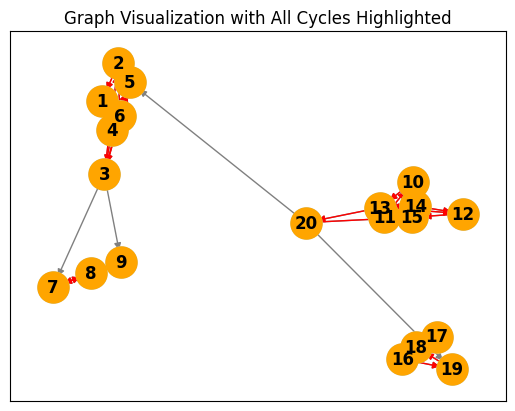

In [26]:
# EX3
'''
20 37 
1 4
2 1
3 2
3 5
3 7
3 9
4 3
4 5
5 2
5 6
6 1
6 2
6 3
7 8
8 9
9 7
10 13
11 10
12 15
13 12
13 14
13 20
14 11
14 12
14 13
14 15
15 10
15 11
15 14
16 19
17 16
18 16
18 17
19 18
20 5
20 15
20 19
'''
N = 20
edges = [
    (1, 4), (2, 1), (3, 2), (3, 5), (3, 7),
    (3, 9), (4, 3), (4, 5), (5, 2), (5, 6),
    (6, 1), (6, 2), (6, 3), (7, 8), (8, 9),
    (9, 7), (10, 13), (11, 10), (12, 15), (13, 12),
    (13, 14), (13, 20), (14, 11), (14, 12), (14, 13),
    (14, 15), (15, 10), (15, 11), (15, 14), (16, 19),
    (17, 16), (18, 16), (18, 17), (19, 18), (20, 5),
    (20, 15), (20, 19)
]
run_test(N, edges)